**Vamos experimentar agora a Rede Neural Artificial?**
Veja:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html# 

In [54]:
!pip -q install yellowbrick

In [55]:
import pandas as pd
from scipy.stats import randint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

In [56]:
# from google.colab import drive
# drive.mount('/content/drive')

In [57]:
import pickle
with open('merge.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

**Vamos treinar com a rede neural?**

**Experimente a RNA com os parâmetros default. A rede convergiu? quantas épocas?**

In [58]:
modelo = MLPClassifier()
#rede_neural = MLPClassifier(max_iter=1000, verbose=True, tol=0.00001, solver = 'adam', activation = 'relu',hidden_layer_sizes = (3, 2, 1))
modelo.fit(X_treino, y_treino)

c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [59]:
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (50, 50), (100, 100), (150, 150)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': randint(100, 1000),
    'tol': [1e-3, 1e-4, 1e-5]
}
random_search = RandomizedSearchCV(modelo, param_distributions=param_dist, n_iter=50, cv=5)
search=random_search.fit(X_treino, y_treino)
search.best_params_


c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (418) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (418) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (418) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (418) reached and 

{'activation': 'identity',
 'alpha': 0.001,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.01,
 'max_iter': 616,
 'solver': 'sgd',
 'tol': 0.0001}

**Depois execute novamente com os ajustes. Veja agora os erros a cada época.. estabeleça o verbose para true **

In [60]:
# {'activation': 'identity',
#  'alpha': 0.01,
#  'hidden_layer_sizes': (150, 150),
#  'learning_rate': 'invscaling',
#  'learning_rate_init': 0.001,
#  'max_iter': 425,
#  'solver': 'adam',
#  'tol': 1e-05}
modelo = MLPClassifier(activation=search.best_params_['activation'],max_iter=search.best_params_['max_iter'], hidden_layer_sizes=search.best_params_['hidden_layer_sizes'],learning_rate=search.best_params_['learning_rate'],learning_rate_init=search.best_params_['learning_rate_init'],solver=search.best_params_['solver'],tol=search.best_params_['tol'], verbose=True)
modelo.fit(X_treino, y_treino)

Iteration 1, loss = 0.72635071
Iteration 2, loss = 0.71025552
Iteration 3, loss = 0.68919160
Iteration 4, loss = 0.66523654
Iteration 5, loss = 0.65206136
Iteration 6, loss = 0.61449018
Iteration 7, loss = 0.59741035
Iteration 8, loss = 0.58517473
Iteration 9, loss = 0.57397273
Iteration 10, loss = 0.57911469
Iteration 11, loss = 0.56300060
Iteration 12, loss = 0.56173116
Iteration 13, loss = 0.56571287
Iteration 14, loss = 0.56933692
Iteration 15, loss = 0.57203215
Iteration 16, loss = 0.55148143
Iteration 17, loss = 0.54830198
Iteration 18, loss = 0.55076596
Iteration 19, loss = 0.54660366
Iteration 20, loss = 0.54715952
Iteration 21, loss = 0.55522864
Iteration 22, loss = 0.55468823
Iteration 23, loss = 0.54218602
Iteration 24, loss = 0.54656943
Iteration 25, loss = 0.54475355
Iteration 26, loss = 0.53995634
Iteration 27, loss = 0.53919212
Iteration 28, loss = 0.54163812
Iteration 29, loss = 0.53935317
Iteration 30, loss = 0.53769790
Iteration 31, loss = 0.53672598
Iteration 32, los

MLPClassifier(activation='identity', learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=616, solver='sgd',
              verbose=True)

**Faça outras alterações nos parâmetros**

**4 entradas - 3 neurônios - 3 neurônios - 1**

**Veja SoftMax para problemas multiclasse**

In [61]:
rede_neural = MLPClassifier(max_iter=1000, verbose=True, tol=0.00000000000001, solver = 'adam', activation = 'relu', hidden_layer_sizes = 9)
modelo.fit(X_treino, y_treino)

Iteration 1, loss = 0.82400383
Iteration 2, loss = 0.67739175
Iteration 3, loss = 0.69834522
Iteration 4, loss = 0.63370754
Iteration 5, loss = 0.60660123
Iteration 6, loss = 0.58918412
Iteration 7, loss = 0.58634688
Iteration 8, loss = 0.56877389
Iteration 9, loss = 0.55997010
Iteration 10, loss = 0.55554436
Iteration 11, loss = 0.55018432
Iteration 12, loss = 0.55262859
Iteration 13, loss = 0.54397225
Iteration 14, loss = 0.55124901
Iteration 15, loss = 0.54495354
Iteration 16, loss = 0.54398712
Iteration 17, loss = 0.54863827
Iteration 18, loss = 0.54499848
Iteration 19, loss = 0.54694152
Iteration 20, loss = 0.54316280
Iteration 21, loss = 0.54386376
Iteration 22, loss = 0.54638217
Iteration 23, loss = 0.54675829
Iteration 24, loss = 0.54868166
Iteration 25, loss = 0.54148369
Iteration 26, loss = 0.53771524
Iteration 27, loss = 0.55388677
Iteration 28, loss = 0.53991079
Iteration 29, loss = 0.53886558
Iteration 30, loss = 0.54657273
Iteration 31, loss = 0.54812356
Iteration 32, los

MLPClassifier(activation='identity', learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=616, solver='sgd',
              verbose=True)



> **Vamos testar o modelo?**



In [62]:
previsoes = modelo.predict(X_teste)

In [63]:
previsoes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])



> **Será se o modelo acertou?**



In [64]:
y_teste

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1])

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.6724137931034483

In [66]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[35,  1],
       [18,  4]], dtype=int64)

0.6724137931034483

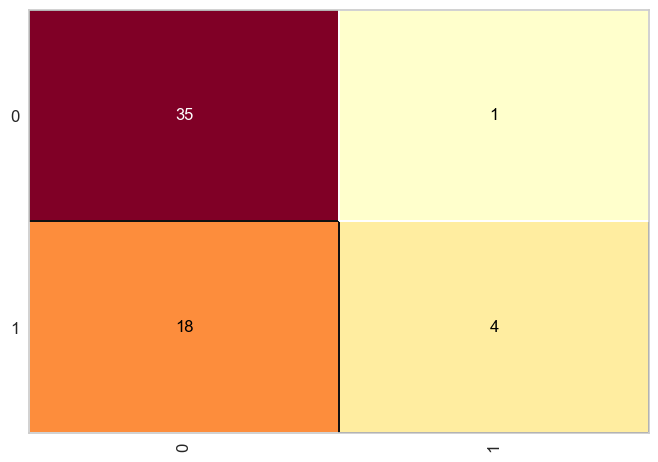

In [67]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [68]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.66      0.97      0.79        36
           1       0.80      0.18      0.30        22

    accuracy                           0.67        58
   macro avg       0.73      0.58      0.54        58
weighted avg       0.71      0.67      0.60        58



**Veja como implementar o backpropagation em python:**
https://www.askpython.com/python/examples/backpropagation-in-python
https://www.deeplearningbook.com.br/algoritmo-backpropagation-em-python/
